In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [15]:
len(y)

2580

In [16]:
X.shape

(2580, 82)

In [17]:
X.shape[1]

82

In [4]:
Scores = []
AdjR2 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    RF_No_Bootstrap = RandomForestRegressor(n_estimators=100, criterion='squared_error', 
                                            bootstrap=False)
    RF_No_Bootstrap.fit(X_train_scaled, Y_train)
    RF_No_Bootstrap_Score = RF_No_Bootstrap.score(X_test_scaled, Y_test)
    
    Scores.append(RF_No_Bootstrap_Score)
    
    Adj_r2 = 1 - (1 - RF_No_Bootstrap_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    

In [5]:
PositiveR2 = []
NegativeR2 = []

for i in Scores:
    if i < 0:
        NegativeR2.append(i)
    else:
        PositiveR2.append(i)

In [6]:
PositiveAR2 = []
NegativeAR2 = []

for i in AdjR2:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [7]:
R2 = pd.DataFrame(PositiveR2, columns=['R_Squared'])
AR2 = pd.DataFrame(PositiveAR2, columns=['Adjusted_R2'])
R2vAR2 = pd.concat([R2, AR2], axis=1)
R2vAR2

,R_Squared,Adjusted_R2
0,0.731755,0.722946
1,0.806488,0.800133
2,0.829454,0.823853
3,0.800150,0.793587
4,0.782843,0.775712
...,...,...
95,0.746874,0.738561
96,0.779073,0.771818
97,0.792164,0.785338
98,0.763078,0.755298


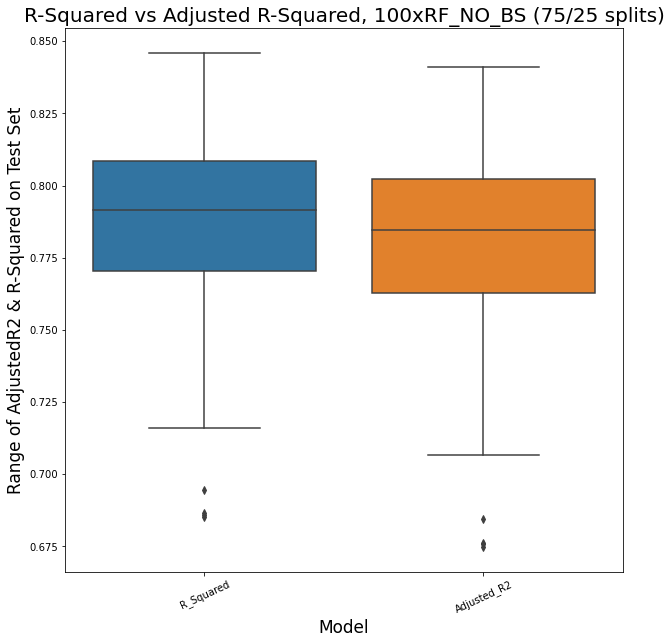

In [8]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xRF_NO_BS (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=R2vAR2)
plt.xticks(rotation=25);

In [9]:
print("Number of times results produced Negative R2: " + str((len(NegativeR2))))
print("Number of times results produced Negative Adjusted R2: " + str((len(NegativeAR2))))

Number of times results produced Negative R2: 0
Number of times results produced Negative Adjusted R2: 0


In [10]:
#df = pd.DataFrame(Positive, columns=['RF No Bootstrap'])
R2vAR2.to_csv('RF_NO_BS_R2vAR2.csv', index=False)

In [11]:
R2vAR2['Difference'] = R2vAR2['R_Squared'] - R2vAR2['Adjusted_R2']

In [12]:
R2vAR2

,R_Squared,Adjusted_R2,Difference
0,0.731755,0.722946,0.008809
1,0.806488,0.800133,0.006355
2,0.829454,0.823853,0.005601
3,0.800150,0.793587,0.006563
4,0.782843,0.775712,0.007131
...,...,...,...
95,0.746874,0.738561,0.008313
96,0.779073,0.771818,0.007255
97,0.792164,0.785338,0.006825
98,0.763078,0.755298,0.007780


In [13]:
R2vAR2.Difference.mean()

0.007076574641537678

In [14]:
R2vAR2.describe()

,R_Squared,Adjusted_R2,Difference
count,100.000000,100.000000,100.000000
mean,0.784510,0.777433,0.007077
std,0.033129,0.034217,0.001088
min,0.685163,0.674824,0.005057
25%,0.770332,0.762790,0.006290
50%,0.791401,0.784550,0.006850
75%,0.808458,0.802168,0.007542
max,0.846013,0.840956,0.010339
